## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [4]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')

# for Interactive Shells
from IPython.display import display

In [5]:
df = pd.read_csv('../DATA/sonar.all-data.csv')

In [6]:
# shape
df.shape

(208, 61)

In [9]:
# types
pd.set_option('display.max_rows', 500)
df.dtypes

Freq_1     float64
Freq_2     float64
Freq_3     float64
Freq_4     float64
Freq_5     float64
Freq_6     float64
Freq_7     float64
Freq_8     float64
Freq_9     float64
Freq_10    float64
Freq_11    float64
Freq_12    float64
Freq_13    float64
Freq_14    float64
Freq_15    float64
Freq_16    float64
Freq_17    float64
Freq_18    float64
Freq_19    float64
Freq_20    float64
Freq_21    float64
Freq_22    float64
Freq_23    float64
Freq_24    float64
Freq_25    float64
Freq_26    float64
Freq_27    float64
Freq_28    float64
Freq_29    float64
Freq_30    float64
Freq_31    float64
Freq_32    float64
Freq_33    float64
Freq_34    float64
Freq_35    float64
Freq_36    float64
Freq_37    float64
Freq_38    float64
Freq_39    float64
Freq_40    float64
Freq_41    float64
Freq_42    float64
Freq_43    float64
Freq_44    float64
Freq_45    float64
Freq_46    float64
Freq_47    float64
Freq_48    float64
Freq_49    float64
Freq_50    float64
Freq_51    float64
Freq_52    float64
Freq_53    f

In [10]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [11]:
# describe data
pd.set_option('precision', 3)
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [14]:
# class distribution
df.groupby('Label').size()

Label
M    111
R     97
dtype: int64

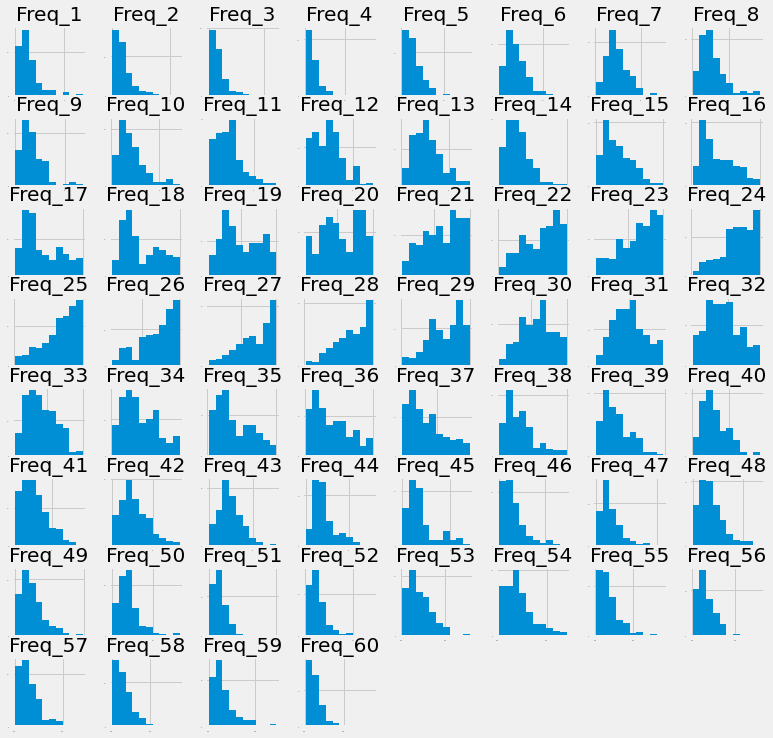

In [17]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show();

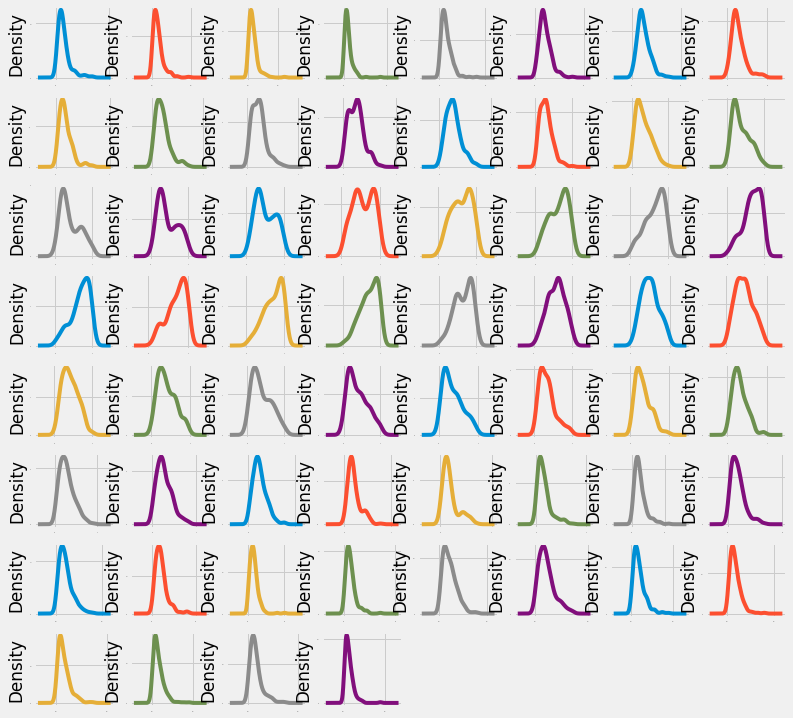

In [18]:
# density
df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
plt.show();

<AxesSubplot:>

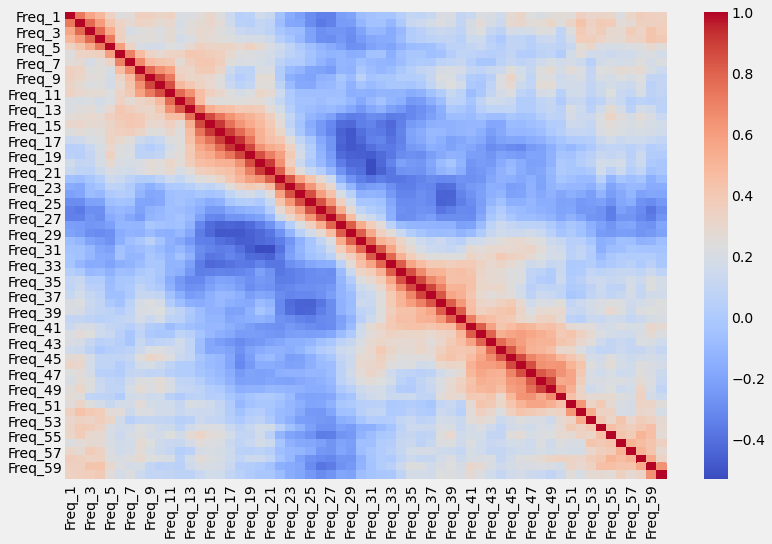

In [20]:
import seaborn as sns

sns.heatmap(df.corr(),cmap='coolwarm')

**let's see What are the top 5 correlated frequencies with the target\label?**

In [21]:
df['Target'] = df['Label'].map({'R':0,'M':1})

In [22]:
np.abs(df.corr()['Target']).sort_values().tail(6)

Freq_45    0.339
Freq_10    0.341
Freq_49    0.351
Freq_12    0.392
Freq_11    0.433
Target     1.000
Name: Target, dtype: float64

In [32]:
# splitting out validation dataset for the end
array = df.values
X = df.drop(['Target','Label'],axis=1)
y = df['Label']
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [33]:
# test options
num_folds = 10
scoring = 'accuracy'

In [34]:
#using various algorithm
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [35]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769485 (0.100510)
KNN: 0.808088 (0.067507)
CART: 0.740441 (0.068053)
NB: 0.648897 (0.141868)
SVM: 0.776471 (0.090411)


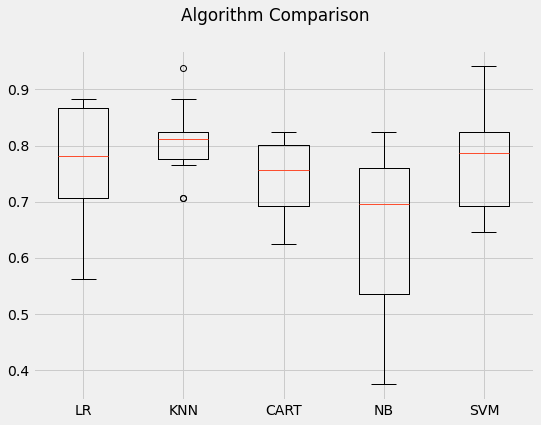

In [37]:
# comparing algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

In [38]:
# standardized the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [40]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds,)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.740441 (0.094668)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.705515 (0.085914)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


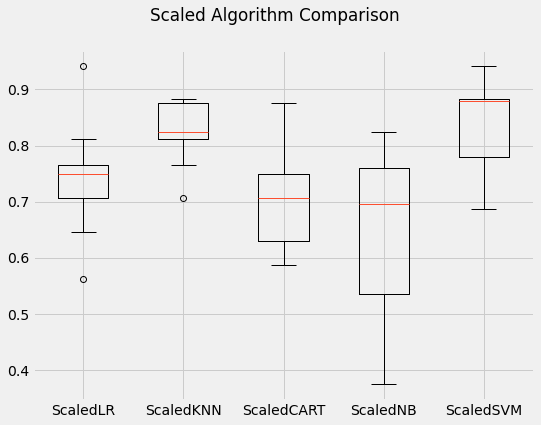

In [41]:
# comparing scaled algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

**We can see that KNN and SVM are giving good results with respect to other models**

In [43]:
# KNN algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [44]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.850000 using {'n_neighbors': 1}
#1 0.850000 (0.059686) with: {'n_neighbors': 1}
#3 0.837132 (0.066014) with: {'n_neighbors': 3}
#2 0.837500 (0.037377) with: {'n_neighbors': 5}
#4 0.763971 (0.089374) with: {'n_neighbors': 7}
#5 0.751471 (0.087051) with: {'n_neighbors': 9}
#6 0.733456 (0.104831) with: {'n_neighbors': 11}
#7 0.733088 (0.105806) with: {'n_neighbors': 13}
#8 0.727941 (0.076148) with: {'n_neighbors': 15}
#11 0.709926 (0.079287) with: {'n_neighbors': 17}
#9 0.722059 (0.085088) with: {'n_neighbors': 19}
#10 0.710294 (0.109505) with: {'n_neighbors': 21}


In [46]:
# SVM algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [47]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.872426 using {'C': 2.0, 'kernel': 'rbf'}
#19 0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
#40 0.535294 (0.114222) with: {'C': 0.1, 'kernel': 'poly'}
#39 0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
#36 0.704044 (0.066933) with: {'C': 0.1, 'kernel': 'sigmoid'}
#27 0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
#38 0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
#16 0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
#31 0.734926 (0.054567) with: {'C': 0.3, 'kernel': 'sigmoid'}
#30 0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
#37 0.662132 (0.105668) with: {'C': 0.5, 'kernel': 'poly'}
#12 0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
#25 0.746691 (0.058742) with: {'C': 0.5, 'kernel': 'sigmoid'}
#25 0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
#27 0.746324 (0.129754) with: {'C': 0.7, 'kernel': 'poly'}
#11 0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
#17 0.758824 (0.047088) with: {'C': 0.7, 'kernel': 's

**from above two results we can observe that Support vector classifier performs best with the accuracy of more than 87%**

### Trying with ensemble models

In [48]:
# ensembles
ensembles = []
# Boosting methods
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
ensembles.append(('RF', RandomForestClassifier()))

In [49]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.813971 (0.066017)
GBM: 0.835662 (0.113257)
RF: 0.818382 (0.095123)


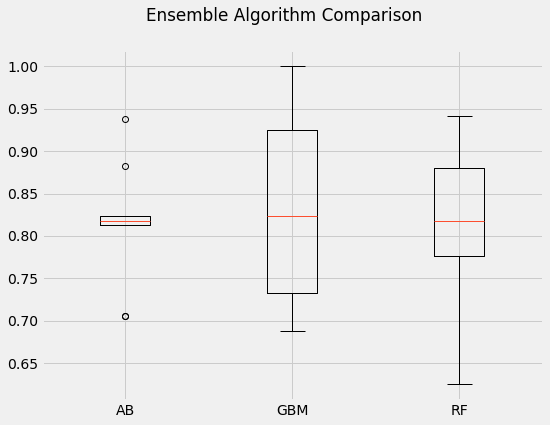

In [50]:
# compare ensemble algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
pyplot.show()

**From all above models we can see that SVM performs best so let's select it as our final model**

In [51]:
# preparing model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)

SVC(C=1.5)

In [52]:
# estimate accuracy on validation set
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



**we get an accuracy of more than 85% which is quite good**

In [57]:
predictions

array(['R', 'M', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M', 'M',
       'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R'], dtype=object)